# Chapter 4 - Displaying and Summarizing Quantitative Data

In [5]:
# %load ./snippets/data-imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

### Histograms

Where a bar chart provides a natural way to show the distribution of a categorical variable using bars for each level, a quantitative variable doesn't automatically provide such natural groupings:

* slice up possible values into equal-width-bins
* bins + counts give distribution of _quantitative_ variable
* **histogram**: plot counts as bars against bin values
* _imagine what the distribution might look like before making the display -- to help identify errors in generating the display_
* unlike bar charts, spaces in a histogram represent actual gaps in the data
* _relative frequency_ histogram displays the y axis as a percentage of the total
  * same shape as basic histogram (counts), but different units

In [22]:
# some data to work with
s = Series(data = [12, 127, 28, 42, 39, 113, 42, 18, 44, 118, 44, 37, 113, 124, 37,
              48, 127, 36, 29, 31, 125, 139, 131, 115, 105, 132, 104, 123, 35,
              113, 122, 42, 117, 119, 58, 109, 23, 105, 63, 27, 44, 105, 99,
              41, 128, 121, 116, 125, 32, 61, 37, 127, 29, 113, 121, 58, 114,
              126, 53, 114, 96, 25, 109, 7, 31, 141, 46, 13, 27, 43, 117, 116,
              27, 7, 68, 40, 31, 115, 124, 42, 128, 52, 71, 118, 117, 38, 27,
              106, 33, 117, 116, 111, 40, 119, 47, 105, 57, 122, 109, 124, 115,
              43, 120, 43, 27, 27, 18, 28, 48, 125, 107, 114, 34, 133, 45, 120,
              30, 127, 31, 116, 146])

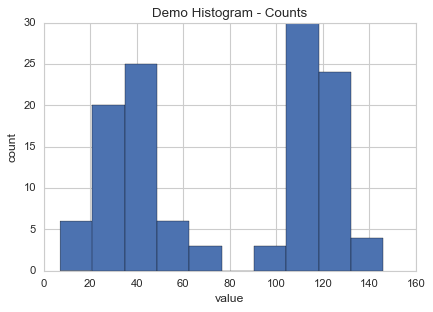

In [29]:
# basic histogram - counts
plt.hist(s)
plt.xlabel('value')
plt.ylabel('count')
plt.title('Demo Histogram - Counts')
plt.show()

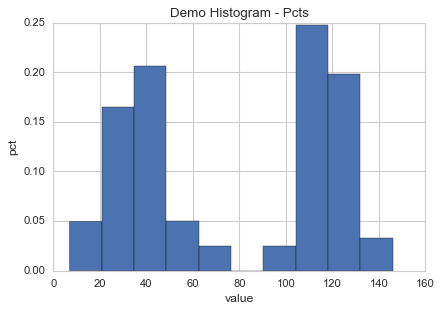

In [30]:
# relative frequency histogram - %
plt.hist(s, weights=np.zeros_like(s) + 1. / s.size)
plt.xlabel('value')
plt.ylabel('pct')
plt.title('Demo Histogram - Pcts')
plt.show()

### Stem-and-Leaf Displays

* similar to a histogram, but it shows individual values
* particularly useful when made by hand for data with fewer than a few hundred data values

In [19]:
# from https://www.rosettacode.org/wiki/Stem-and-leaf_plot#Python
from math import floor
  
def stemplot(values, leafdigits):
    d = []
    interval = int(10**int(leafdigits))
    for data in sorted(values):
        data = int(floor(data))
        stm, lf = divmod(data,interval)
        d.append( (int(stm), int(lf)) )
    stems, leafs = list(zip(*d))
    stemwidth = max(len(str(x)) for x in stems)
    leafwidth = max(len(str(x)) for x in leafs)
    laststem, out = min(stems) - 1, []
    for s,l in d:
        while laststem < s:
            laststem += 1
            out.append('\n%*i |' % ( stemwidth, laststem))
        out.append(' %0*i' % (leafwidth, l))
    out.append('\n\nKey:\n Stem multiplier: %i\n X | Y  =>  %i*X+Y\n'
               % (interval, interval))
    return ''.join(out)

In [21]:
print(stemplot(s, 1.0))


 0 | 7 7
 1 | 2 3 8 8
 2 | 3 5 7 7 7 7 7 7 8 8 9 9
 3 | 0 1 1 1 1 2 3 4 5 6 7 7 7 8 9
 4 | 0 0 1 2 2 2 2 3 3 3 4 4 4 5 6 7 8 8
 5 | 2 3 7 8 8
 6 | 1 3 8
 7 | 1
 8 |
 9 | 6 9
10 | 4 5 5 5 5 6 7 9 9 9
11 | 1 3 3 3 3 4 4 4 5 5 5 6 6 6 6 7 7 7 7 8 8 9 9
12 | 0 0 1 1 2 2 3 4 4 4 5 5 5 6 7 7 7 7 8 8
13 | 1 2 3 9
14 | 1 6

Key:
 Stem multiplier: 10
 X | Y  =>  10*X+Y



### Dotplots

* similar to stem-and-leaf display, but using dots rather than digits
* options: horizontal vs. vertical; overlapping vs non-overlapping dots

In [38]:
# TODO: find implementation using Matplotlib...

### Shape of a Distribution

* Does the histogram have a single, central hump or several humps (**modes**)?
    * unimodal, bimodal, multimodal
    * if all bars are approximately the same height: **uniform**
* Is the histogram symmetric?
    * ends of a distribution are called the **tails**
    * if one tail stretches out farther than the other, the distribution is said to be **skewed** to the side of the longer tail
* Do any unusual features stick out?
    * **outliers**
    * **gaps** in the distribution

### Center - Median

* one measure of the **center** of a distribution
* the value with half the values below it and half the values above it
* the value that divides the histogram into two equal areas
* **resistant** to outliers

Method to find:
* order values
* if _n_ is odd, median is the middle value
* if _n_ is even, find values at positions n/2 and n/2 + 1 -- add and divide by 2

In [46]:
s.median()

96.0

### Spread - Range

* Measure of **spread**; how much values vary
* **range** is the difference between the max and min values
* disadvantage: outliers have a big impact

In [42]:
s.max() - s.min()

139

### Spread - IQR

* approach to avoid effect of outliers: focus on middle values
* basically the range of the "middle half" of the data
* divide data up into 4 equal areas (in half, then each in half again): **quartiles**
    * 1/4 of data lies below **lower quartile** (25th percentile, 'Q1')
    * 1/4 of data lies above **upper quartile** (75th percentile, 'Q3')
    * 1/2 of data lies between them
* the difference between the quartiles tells us the **interquartile range** (IQR)
* IQR is almost always a reasonable summary of the spread of a distribution
    * even if skewed or with outliers
    * one exception: strongly bimodal distribution
* multiple techniques for calculating the values of the quartiles
    * differ in how odd _n_ is handled; whether values median included; etc.

In [44]:
s.quantile(0.75) - s.quantile(0.25)

80.0

### 5 Number Summary

* summary that includes:
    * median
    * quartiles (lower/upper)
    * extremes (min/max)
* also useful to includen count

In [39]:
s.describe()

count    121.000000
mean      78.173554
std       42.436163
min        7.000000
25%       37.000000
50%       96.000000
75%      117.000000
max      146.000000
dtype: float64

### Step-by-Step Example

Shape, Center, and Spread

* variable: identify the variable and decide how you wish to display it
    * report the W's
    * select an appropriate display based on the nature of the data and what you want to know
* mechanics: decide on approach (technology or manual) for displaying
    * it's always a good idea to think about what you expect to see so that you can check whether the display looks like what you expected
* interpretation: 
    * describe the shape, center, and spread of the distribution
    * report on the symmetry, number of modes, any gaps or outliers
    * note any concerns you may have about the data

### Center - Mean

* does a good job of summarizing center when unimodal, not skewed, and no outliers
* **mean** is the point where the histogram 'balances'
* when choosing between mean & median:
    * mean if unimodal, not skewed, and no outliers
    * median in other cases
    * often valuable to include both, and discuss concerns given the distribution

$\bar{y} = \frac{Total}{n} = \frac{\sum{y}}{n}$

In [47]:
s.mean()

78.17355371900827

When to expect skewness:

* cases where values can't be less than 0
    * incomes, wait times, etc
* amounts of things for the same reason
* combinations of things often lead to skew

### Spread - Standard Deviation

* appropriate only for symmetric data
* **variance** = mean squared deviation from mean of all values

$s^2 = \frac{\sum{(y - \bar{y})^2}}{n - 1}$

* variance is in squared units
* we take the square root of variance to get back to original units -> **standard deviation**

$s = \sqrt{\frac{\sum{(y - \bar{y})^2}}{n - 1}}$


In [48]:
# sample std dev
s.std()

42.43616336843503

In [51]:
# population std dev (/n rather than /n-1)
s.std(ddof=0)

42.260443510665965

Measures of spread help us to be precise about what we _don't_ know.

### What to tell about a Quantitative Variable

* histogram or stem-and-leaf display
* discuss shape of distribution
* discuss center & spread
    * if skewed - median + IQR; maybe mean & stddev, but discuss difference from median
    * if symmetric - mean + standard deviation; maybe median & IQR too
        * for unimodal, IQR is usually a bit larger than std dev
* discuss any unusual features
    * multiple modes
        * reason?
        * would it make sense to split modes and re-evaluate each individually?
    * outliers
        * point them out
        * if reporting mean and stddev, consider reporting both w/ and w/o outliers

### Step-by-Step Example

Summarizing a Distribution

* plan: state what you want to find out
* variable: identify the variable and report the W's
* check appropriate conditions
* mechanics: make histogram; based on shape, choose appropriate numerical summaries
* conclusion: summarize and interpret your findings in context; be sure to discuss distribution shape, center, spread, and unusual features

### What Can Go Wrong

Display of Quantitative Data

* don't make a histogram of a categorical variable
* don't look for shape, center, spread of a bar chart
    * concepts like symmetry, center, and spread only make sense for quantitative variables
* don't use bars in every display: save them for histograms and bar charts
    * **INVESTIGATE**
* choose a bin width appropriate to the data

Summarizing a Quantitative Variable

* don't forget to do a reality check
* don't forget to sort the values before finding the median or percentiles
* don't worry about small differences when using different methods
* don't compute numerical summaries of a categorical variable
* don't report too many decimal places
* don't round in the middle of a calculation
* watch out for multiple modes
    * consider separating and generating summaries off each
* beware of outliers
* don't forget to make a picture

### What Have We Learned

#### Terms

* distribution
* histogram
* gap
* stem-and-leaf display
* dotplot
* shape
* mode
* unimodal (bimodal)
* uniform
* symmetric
* tails
* skewed
* outliers
* center
* median
* spread
* range
* quartile
* percentile
* interquartile range (IQR)
* 5-Number Summary
* mean
* resistant
* variance
* standard deviation

#### Skills

* [pg. 68-69] 